Импортируем необходимые для работы библиотеки

In [693]:
import pandas as pd

Рассмотрим изначальную выборку данных, в ней содержаться положительные и отрицательные данные

In [694]:
df = pd.read_csv("C:/projects/diplom/diplom_itis_2022/ml/resources/data.csv")
df.head()

,Наименование,Вид деятельности/отрасль,Код основного вида деятельности,"Кредитный лимит, RUB","Сумма незавершенных исков в роли ответчика, RUB",Сумма исполнительных производств,Размер компании,"2020, Среднесписочная численность работников","Уставный капитал, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB",result
0,"144 БТРЗ, АО",Ремонт машин и оборудования,33.12,NaN,0.00,"90,109.00",NaN,NaN,"1,424,335,000.00",NaN,NaN,1
1,"1470 УМТО, АО",Деятельность по складированию и хранению,52.10,NaN,"331,800.00",NaN,Малые предприятия,325.00,"2,374,008,000.00","575,927,000","-57,048,000",1
2,"1472 ВМКГ МИНОБОРОНЫ РОССИИ, ФГБУ",Деятельность больничных организаций,86.10,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1
3,15 ОТДЕЛ ГФС РОССИИ,Деятельность федеральной фельдъегерской связи,53.20.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"1520 СИГНАЛ, ООО",Деятельность по созданию и использованию баз д...,63.11.1,99 870 000,0.00,NaN,Крупные предприятия,195.00,"11,700,000.00","2,597,915,000","150,058,000",1


В рамках пре подготовки данных:
* колонки "Вид деятельности, отрасль" и "Размер компании" были замены на идентификаторы значений из базы,
* Колонки были переименованы
* Формат ячеек был изменен на числовой тип

In [695]:
df = pd.read_csv("C:/projects/diplom/diplom_itis_2022/ml/resources/pre_prepared_data.csv")
df.head()

,companyName,industryId,creditLimit,amountOfLawsuits,amountOfProceedings,companySizeTypeId,amountOfWorkers,capital,revenue,netProfit,result
0,144БТРЗАО,884.0,NaN,0.0,90109.0,NaN,NaN,1.424335e+09,NaN,NaN,1
1,1470УМТОАО,1560.0,NaN,331800.0,NaN,2.0,325.0,2.374008e+09,5.759270e+08,-57048000.0,1
2,1472ВМКГМИНОБОРОНЫРОССИИФГБУ,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,15ОТДЕЛГФСРОССИИ,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1520СИГНАЛООО,1276.0,99870000.0,0.0,NaN,4.0,195.0,1.170000e+07,2.597915e+09,150058000.0,1


Узнаем количество ячеек

In [696]:
df.shape

(129037, 11)

Узнаем количество ячеек, значение которых отличны от null

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129037 entries, 0 to 129036
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   companyName          129037 non-null  object 
 1   industryId           113073 non-null  float64
 2   creditLimit          52839 non-null   float64
 3   amountOfLawsuits     106564 non-null  float64
 4   amountOfProceedings  24732 non-null   float64
 5   companySizeTypeId    107807 non-null  float64
 6   amountOfWorkers      93529 non-null   float64
 7   capital              111866 non-null  float64
 8   revenue              102561 non-null  float64
 9   netProfit            103846 non-null  float64
 10  result               129037 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 10.8+ MB


Пройдемся по колонкам:

* companyName - название компании
* industryId - идентификатор отрасли(вида деятельности) компании
* creditLimit - Кредитный лимит, RUB
* amountOfLawsuits - Сумма незавершенных исков в роли ответчика, RUB
* amountOfProceedings - Сумма исполнительных производств, RUB
* amountOfWorkers - Среднесписочная численность работников
* capital - Уставный капитал, RUB
* revenue - Выручка, RUB
* netProfit - Чистая прибыль (убыток), RUB
* companySizeTypeId - идентификатор размера компании
* result - Был выдан кредит или нет.

Узнаем eсть ли в данных аномалии

In [698]:
df.describe()

,industryId,creditLimit,amountOfLawsuits,amountOfProceedings,companySizeTypeId,amountOfWorkers,capital,revenue,netProfit,result
count,113073.000000,5.283900e+04,1.065640e+05,2.473200e+04,107807.000000,93529.000000,1.118660e+05,1.025610e+05,1.038460e+05,129037.00000
mean,1612.065347,4.695684e+07,1.546332e+07,7.646417e+06,1.295593,60.147430,1.222584e+08,7.394278e+08,4.575355e+07,0.95206
std,445.654236,7.666772e+08,1.752232e+09,2.997519e+08,0.675661,2567.492354,8.539317e+09,2.047816e+10,3.543819e+09,0.21364
min,812.000000,1.000000e+05,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,-2.396700e+07,-3.710212e+11,0.00000
25%,1229.000000,3.200000e+05,0.000000e+00,1.000000e+03,1.000000,3.000000,1.000000e+04,5.630000e+06,8.000000e+03,1.00000
50%,1623.000000,1.610000e+06,0.000000e+00,2.030000e+04,1.000000,8.000000,1.000000e+04,2.186900e+07,4.790000e+05,1.00000
75%,2034.000000,7.730000e+06,0.000000e+00,3.257382e+05,1.000000,25.000000,1.000000e+05,8.860800e+07,3.878750e+06,1.00000
max,2366.000000,8.564604e+10,4.232792e+11,4.342200e+10,4.000000,706887.000000,2.497025e+12,4.835091e+12,7.295785e+11,1.00000


Посмотри количество NaN значений

In [699]:
df.isnull().sum()

companyName                 0
industryId              15964
creditLimit             76198
amountOfLawsuits        22473
amountOfProceedings    104305
companySizeTypeId       21230
amountOfWorkers         35508
capital                 17171
revenue                 26476
netProfit               25191
result                      0
dtype: int64

Возьмем названия всех колонок

In [700]:
df.columns

Index(['companyName', 'industryId', 'creditLimit', 'amountOfLawsuits',
       'amountOfProceedings', 'companySizeTypeId', 'amountOfWorkers',
       'capital', 'revenue', 'netProfit', 'result'],
      dtype='object')

#### Рассмотрим результирующее значение, колонка "result"

1    122851
0      6186
Name: result, dtype: int64


<AxesSubplot:>

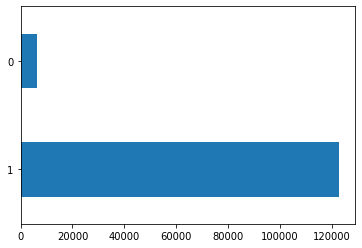

In [701]:
print(df["result"].value_counts())
df["result"].value_counts().plot(kind='barh')

Можно сделать вывод, что в нашей выборке преобладает количество
положительно рассмотренных заявок:
* всего - 129037 - 100 %
* положительные - 122851 - 95.2 %
* отрицательные - 6186 - 4.8 %

Далее будем рассматривать значения в столбцах на
 основании которые был сделан вывод

#### IndustryId - идентификатор отрасли(вида дейтельности) компании

In [702]:
print(df["industryId"].value_counts())

2112.0    6763
1951.0    3625
1145.0    2932
1819.0    2804
1364.0    1789
          ... 
1025.0       1
1342.0       1
845.0        1
1326.0       1
1085.0       1
Name: industryId, Length: 1554, dtype: int64


Необходимо заменить все NaN на идентификатор 0 (значение не указано).

<AxesSubplot:ylabel='Frequency'>

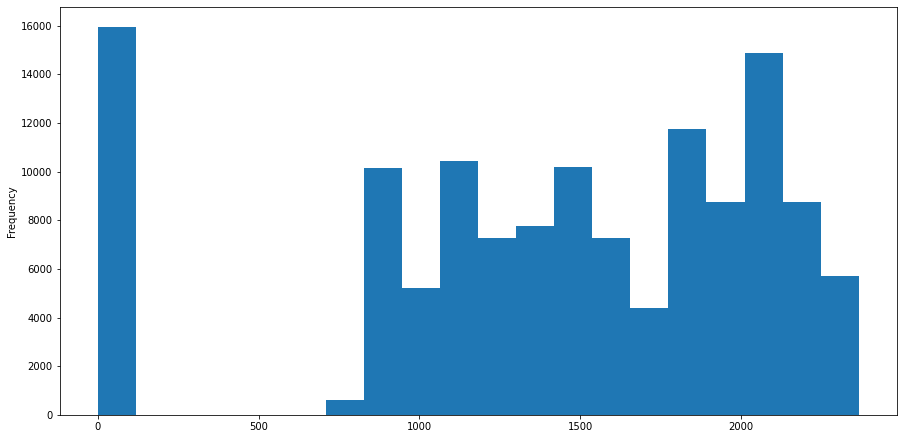

In [703]:
df["industryId"].fillna(value=0,inplace=True)
df["industryId"].plot.hist(bins = 20,figsize=(15,7.5))

Как можно увидеть, отрасли компаний в нашей выборке различны, но преобладают:
* идентификатор - 2112 - Строительство жилых и нежилых зданий
* идентификатор - 1951 - Деятельность частных охранных служб
* идентификатор - 0 - не указано

#### CreditLimit - Кредитный лимит, RUB

In [704]:
print(df["creditLimit"].value_counts())

1.000000e+05    6766
1.100000e+05     437
1.300000e+05     415
1.500000e+05     391
1.200000e+05     385
                ... 
5.643000e+07       1
5.121000e+07       1
1.266700e+08       1
1.308850e+09       1
1.621100e+08       1
Name: creditLimit, Length: 7459, dtype: int64


719417     76198
1000000    30626
100000      6766
110000       437
130000       415
           ...  
980000        81
850000        80
940000        76
950000        74
960000        71
Name: creditLimit, Length: 92, dtype: int64


<AxesSubplot:ylabel='Frequency'>

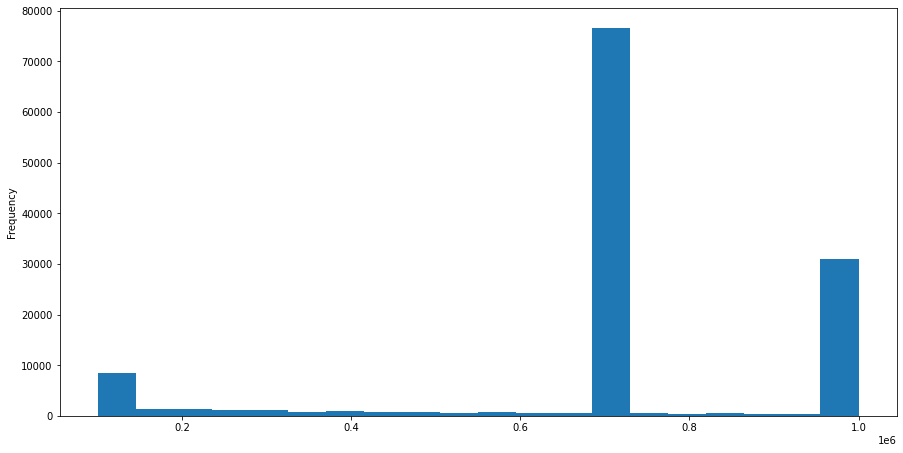

In [705]:
df.loc[df["creditLimit"]>= 1000000,"creditLimit"] = 1000000
df["creditLimit"].fillna(value=df["creditLimit"].mean(),inplace=True)
df['creditLimit']=df['creditLimit'].astype(int)
print(df["creditLimit"].value_counts())
df["creditLimit"].plot.hist(bins = 20,figsize=(15,7.5))

#### AmountOfLawsuits - Сумма незавершенных исков в роли ответчика, RUB

0.0          93051
50000.0        109
100000.0        31
3500.0          22
6000.0          22
             ...  
8356050.0        1
4789825.0        1
2206383.0        1
721248.0         1
616653.0         1
Name: amountOfLawsuits, Length: 12653, dtype: int64
0.000000         93051
10942.836802     22473
100000.000000    10547
50000.000000       109
6000.000000         22
                 ...  
54331.000000         1
94744.000000         1
8151.000000          1
80839.000000         1
62643.000000         1
Name: amountOfLawsuits, Length: 2461, dtype: int64


<AxesSubplot:ylabel='Frequency'>

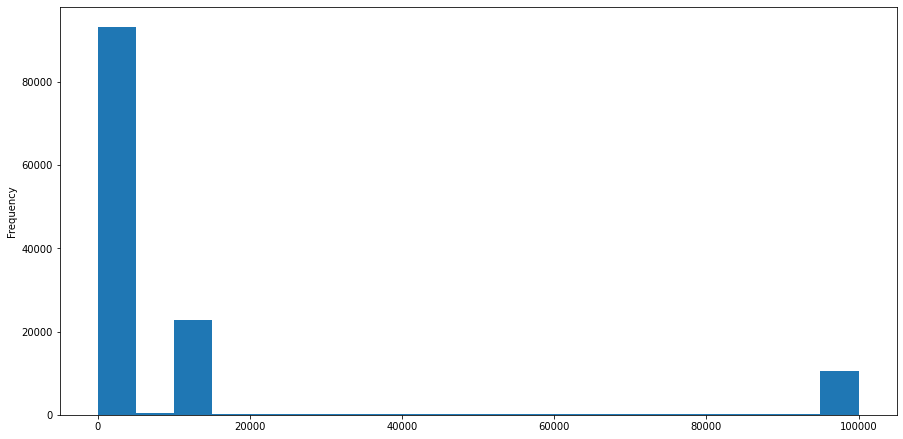

In [706]:
print(df["amountOfLawsuits"].value_counts())
df.loc[df["amountOfLawsuits"]>= 100000,"amountOfLawsuits"] = 100000
df["amountOfLawsuits"].fillna(value=df["amountOfLawsuits"].mean(),inplace=True)
print(df["amountOfLawsuits"].value_counts())
df["amountOfLawsuits"].plot.hist(bins = 20,figsize=(15,7.5))

Как можно заметить на графике, преобладает значение 0.0.
Это вполне корректно, так как рассматривается показатель "сумма незавершенных исков",
а процент положительно одобренных заявок в датасете 95

#### AmountOfProceedings - Сумма исполнительных производств, RUB

0.0           3632
500.0         1449
10000.0        971
1000.0         710
1500.0         279
              ... 
71383.0          1
86329.0          1
6577017.0        1
62641075.0       1
589762.0         1
Name: amountOfProceedings, Length: 13287, dtype: int64
44434.698973     104305
100000.000000      8708
0.000000           3632
500.000000         1449
10000.000000        971
                  ...  
59494.000000          1
16682.000000          1
28496.000000          1
59354.000000          1
69785.000000          1
Name: amountOfProceedings, Length: 5029, dtype: int64


<AxesSubplot:ylabel='Frequency'>

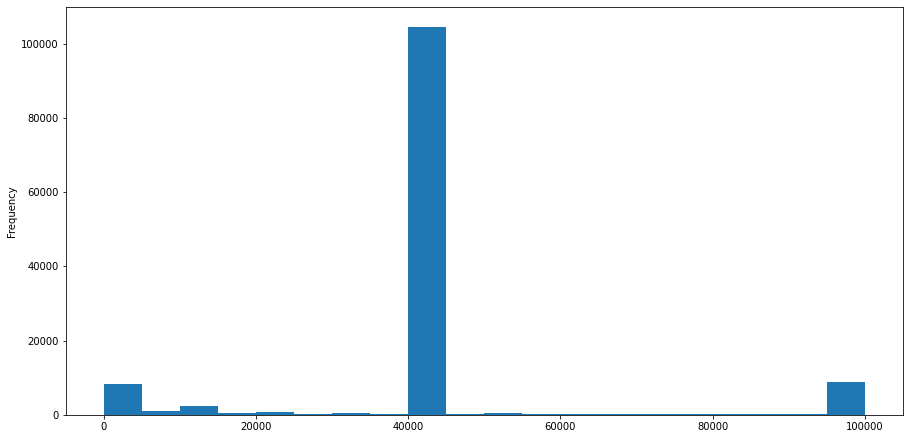

In [707]:
print(df["amountOfProceedings"].value_counts())
df.loc[df["amountOfProceedings"]>= 100000,"amountOfProceedings"] = 100000
df["amountOfProceedings"].fillna(value=df["amountOfProceedings"].mean(),inplace=True)
print(df["amountOfProceedings"].value_counts())
df["amountOfProceedings"].plot.hist(bins = 20,figsize=(15,7.5))

#### AmountOfWorkers - Среднесписочная численность работников

1.0       12725
2.0        7797
3.0        6674
4.0        5606
5.0        4531
          ...  
2209.0        1
981.0         1
5240.0        1
1860.0        1
2278.0        1
Name: amountOfWorkers, Length: 1312, dtype: int64
21.239273     35508
1.000000      12725
2.000000       7797
3.000000       6674
100.000000     6483
              ...  
97.000000        73
91.000000        70
92.000000        70
95.000000        69
96.000000        54
Name: amountOfWorkers, Length: 101, dtype: int64


<AxesSubplot:ylabel='Frequency'>

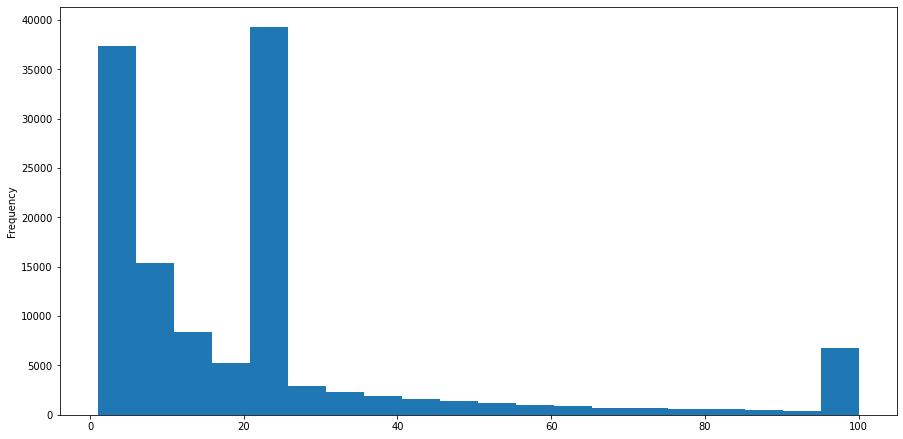

In [708]:
print(df["amountOfWorkers"].value_counts())
df.loc[df["amountOfWorkers"]>= 100,"amountOfWorkers"] = 100
df["amountOfWorkers"].fillna(value=df["amountOfWorkers"].mean(),inplace=True)
print(df["amountOfWorkers"].value_counts())
df["amountOfWorkers"].plot.hist(bins = 20,figsize=(15,7.5))


#### CompanySizeTypeId - идентификатор размера компании

In [709]:
print(df["companySizeTypeId"].value_counts())

1.0    86047
2.0    14930
3.0     3553
4.0     3277
Name: companySizeTypeId, dtype: int64


Необходимо заменить все NaN на идентификатор 0 (значение не указано).

1.0    86047
0.0    21230
2.0    14930
3.0     3553
4.0     3277
Name: companySizeTypeId, dtype: int64


<AxesSubplot:ylabel='Frequency'>

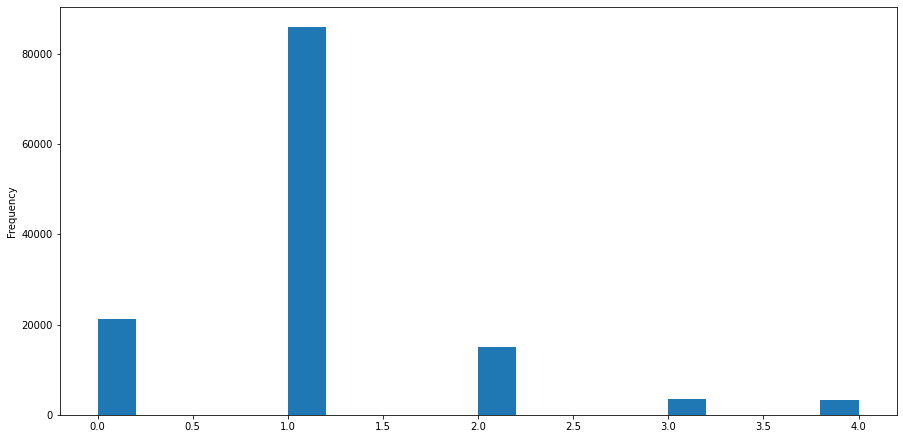

In [710]:
df["companySizeTypeId"].fillna(value=0,inplace=True)
print(df["companySizeTypeId"].value_counts())
df["companySizeTypeId"].plot.hist(bins = 20,figsize=(15,7.5))

Как можно увидеть, размер компаний в нашей выборке различен, но преобладает:
* идентификатор - 1 - Микропредприятия

#### Capital - Уставный капитал, RUB

1.000000e+04    54411
2.000000e+04     4779
1.000000e+05     3987
2.500000e+05     2814
1.500000e+04     2097
                ...  
2.357090e+06        1
1.019366e+09        1
2.209166e+09        1
7.203368e+07        1
1.294100e+04        1
Name: capital, Length: 13315, dtype: int64
10000.000000     54411
100000.000000    30563
37789.655633     17171
20000.000000      4779
15000.000000      2097
                 ...  
16665.000000         1
8840.000000          1
4542.000000          1
26369.000000         1
12941.000000         1
Name: capital, Length: 2371, dtype: int64


<AxesSubplot:ylabel='Frequency'>

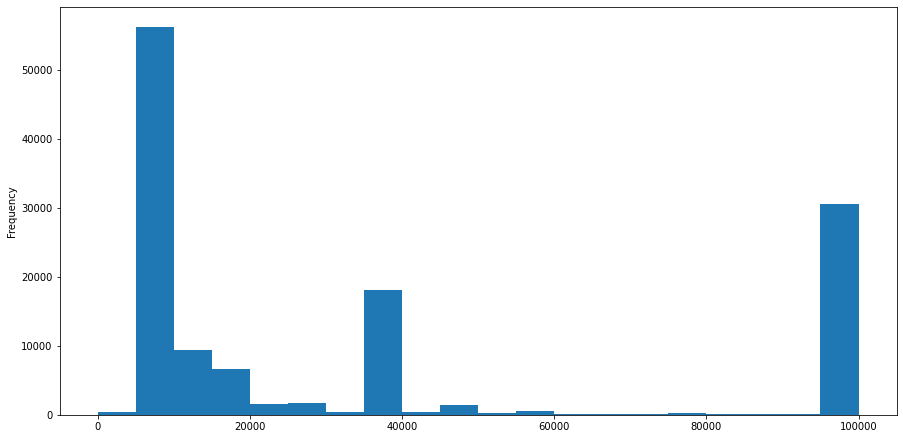

In [711]:
print(df["capital"].value_counts())
df.loc[df["capital"]>= 100000,"capital"] = 100000
df["capital"].fillna(value=df["capital"].mean(),inplace=True)
print(df["capital"].value_counts())
df["capital"].plot.hist(bins = 20,figsize=(15,7.5))

#### Revenue - Выручка, RUB

1.200000e+05    32
6.000000e+04    27
6.000000e+05    26
3.000000e+05    25
1.000000e+05    24
                ..
1.961000e+07     1
1.074170e+08     1
4.249200e+07     1
1.695997e+09     1
4.566600e+07     1
Name: revenue, Length: 63214, dtype: int64
1.000000e+06    66779
1.990059e+06    26476
1.200000e+05       32
6.000000e+04       27
6.000000e+05       26
                ...  
9.436000e+06        1
7.734000e+06        1
7.605000e+06        1
4.207000e+06        1
6.432000e+06        1
Name: revenue, Length: 9421, dtype: int64


<AxesSubplot:ylabel='Frequency'>

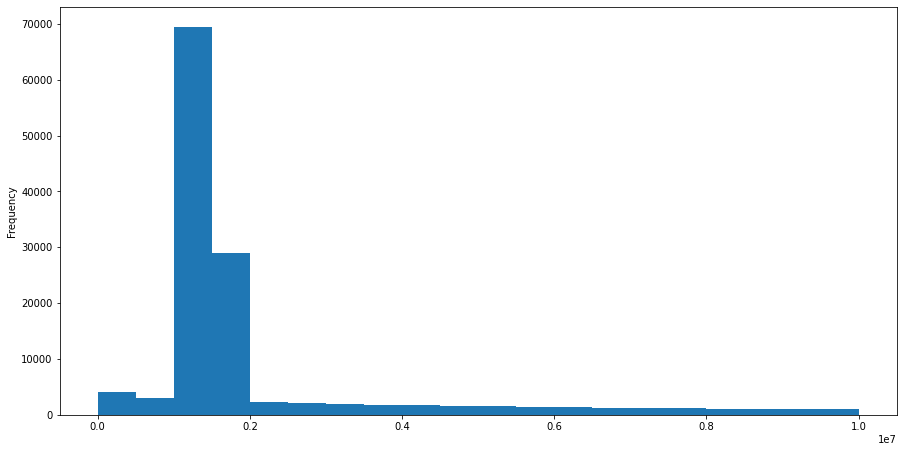

In [712]:
print(df["revenue"].value_counts())
df.loc[df["revenue"]<= 0,"revenue"] = 0
df.loc[df["revenue"]>= 10000000,"revenue"] = 1000000
df["revenue"].fillna(value=df["revenue"].mean(),inplace=True)
print(df["revenue"].value_counts())
df["revenue"].plot.hist(bins = 20,figsize=(15,7.5))

#### NetProfit - Чистая прибыль (убыток), RUB

 1000.0        509
 2000.0        426
 3000.0        292
 6000.0        288
 4000.0        282
              ... 
-27929000.0      1
 13590000.0      1
-39163000.0      1
 10703000.0      1
 9876000.0       1
Name: netProfit, Length: 31370, dtype: int64
1.215160e+06    25191
0.000000e+00    23496
1.000000e+06    15896
1.000000e+03      509
2.000000e+03      426
                ...  
9.511000e+06        1
6.784000e+06        1
4.254000e+06        1
7.189000e+06        1
9.876000e+06        1
Name: netProfit, Length: 8565, dtype: int64


<AxesSubplot:ylabel='Frequency'>

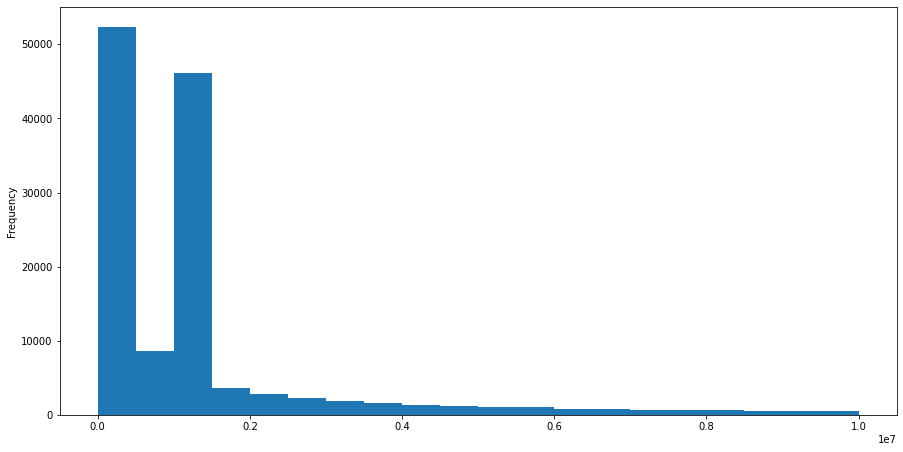

In [713]:
print(df["netProfit"].value_counts())
df.loc[df["netProfit"]<= 0,"netProfit"] = 0
df.loc[df["netProfit"]>= 10000000,"netProfit"] = 1000000
df["netProfit"].fillna(value=df["netProfit"].mean(),inplace=True)
print(df["netProfit"].value_counts())
df["netProfit"].plot.hist(bins = 20,figsize=(15,7.5))

Посмотрим на результат, перед этим обезличив данные

In [714]:
df["companyName"] = "unknown"
df.head(20)

,companyName,industryId,creditLimit,amountOfLawsuits,amountOfProceedings,companySizeTypeId,amountOfWorkers,capital,revenue,netProfit,result
0,unknown,884.0,719417,0.000000,90109.000000,0.0,21.239273,100000.000000,1.990059e+06,1.215160e+06,1
1,unknown,1560.0,719417,100000.000000,44434.698973,2.0,100.000000,100000.000000,1.000000e+06,0.000000e+00,1
2,unknown,0.0,719417,0.000000,44434.698973,0.0,21.239273,37789.655633,1.990059e+06,1.215160e+06,1
3,unknown,1996.0,719417,10942.836802,44434.698973,0.0,21.239273,37789.655633,1.990059e+06,1.215160e+06,1
4,unknown,1276.0,1000000,0.000000,44434.698973,4.0,100.000000,100000.000000,1.000000e+06,1.000000e+06,1
5,unknown,0.0,719417,100000.000000,100000.000000,0.0,21.239273,100000.000000,1.990059e+06,1.215160e+06,1
6,unknown,884.0,1000000,100000.000000,44434.698973,0.0,21.239273,100000.000000,1.990059e+06,1.215160e+06,1
7,unknown,0.0,1000000,0.000000,44434.698973,2.0,100.000000,10000.000000,1.000000e+06,1.000000e+06,1
8,unknown,1364.0,719417,0.000000,44434.698973,0.0,21.239273,37789.655633,1.990059e+06,1.000000e+04,1
9,unknown,897.0,719417,100000.000000,100000.000000,0.0,21.239273,100000.000000,1.990059e+06,1.215160e+06,1


выгрузим результат

In [715]:
df.to_csv('resources/prepared_data.csv')